# Groupchat Anylasis

In [1]:
import sqlite3
import pandas as pd
import datetime

##https://medium.com/analytics-vidhya/https-medium-com-gss-yaim-yet-another-imessage-mining-1bb0d812b002

#1. Something that is not mentioned in her tutorial is some issues with chat.db not loading. If this is occurring, it is because you have to give SQL DB4S and Terminal full disk access. 


In [2]:
conn = sqlite3.connect('/Users/SameerAhmed/Library/Messages/chat.db')
c = conn.cursor()

In [5]:
cmd1 = 'SELECT ROWID, text, handle_id, \
            datetime(date/1000000000 + strftime("%s", "2001-01-01") ,"unixepoch","localtime") as date_utc \
            FROM message T1 \
            INNER JOIN chat_message_join T2 \
                ON T2.chat_id=1725 \
                AND T1.ROWID=T2.message_id \
            ORDER BY T1.date'
c.execute(cmd1)
df_msg = pd.DataFrame(c.fetchall(), columns=['id', 'text', 'sender', 'time'])

In [6]:
df_msg.head(100)

,id,text,sender,time
0,575836,Sameer I’m so sorry but I thought you would ap...,1244,2022-07-10 19:10:44
1,575837,Can he see the old stuff,1047,2022-07-10 19:11:09
2,575838,￼￼￼,1244,2022-07-10 19:11:51
3,575839,Okay you can leave now :),1244,2022-07-10 19:11:51
4,575840,Disliked “Can he see the old stuff”,1244,2022-07-10 19:11:51
...,...,...,...,...
95,575937,THEYRE SO UGLY,1047,2022-07-10 20:03:33
96,575938,Not the single headphone,1244,2022-07-10 20:03:40
97,575939,Laughed at “He got another one an hour later”,1091,2022-07-10 20:03:41
98,575940,Wired headphones,1047,2022-07-10 20:04:04


In [7]:
cmd2 = 'SELECT T1.ROWID, T2.mime_type \
        FROM message T1 \
        INNER JOIN chat_message_join T3 \
            ON T1.ROWID=T3.message_id \
        INNER JOIN attachment T2 \
        INNER JOIN message_attachment_join T4 \
            ON T2.ROWID=T4.attachment_id \
            WHERE T4.message_id=T1.ROWID \
            AND (T3.chat_id=1725)'

In [8]:
c.execute(cmd2)
df_att = pd.DataFrame(c.fetchall(), columns=['id', 'type'])

In [9]:
df_att.head(5)

,id,type
0,575838,video/quicktime
1,575838,video/quicktime
2,575838,video/quicktime
3,575854,image/heic
4,575899,image/heic


In [10]:
df = df_msg.set_index('id').join(df_att.set_index('id'))

In [11]:
df = df_msg
df['time'] = [datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=-4) for t in df['time']]


In [12]:
##changing sneder to name 

df['texter'] = 0

for row in range(len(df)):
    if df['sender'].iloc[row] == 892:
        df['texter'].iloc[row] = 'Farhana'
    if df['sender'].iloc[row] == 1047:
        df['texter'].iloc[row] = 'Khaleja'
    if df['sender'].iloc[row] == 1091:
        df['texter'].iloc[row] = 'Musab'
    if df['sender'].iloc[row] == 1304:
        df['texter'].iloc[row] = 'Oza'
    if df['sender'].iloc[row] == 1152:
        df['texter'].iloc[row] = 'None'
    if df['sender'].iloc[row] == 0:
        df['texter'].iloc[row] = 'Sameer'
    if df['sender'].iloc[row] == 1243:
        df['texter'].iloc[row] = 'Saraah'
    if df['sender'].iloc[row] == 1245:
        df['texter'].iloc[row] = 'Raisa'
    if df['sender'].iloc[row] == 1242:
        df['texter'].iloc[row] = 'Arshiyaa'
    if df['sender'].iloc[row] == 1244:
        df['texter'].iloc[row] = 'Mariam'

/Users/SameerAhmed/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('white')
import numpy as np


/var/folders/jf/7mb6b2h94tng14xyg8t_p8p00000gn/T/ipykernel_29106/136435403.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[k].set_xticklabels(['3am',6,9,'noon','3pm',6,9,'midnight',3])


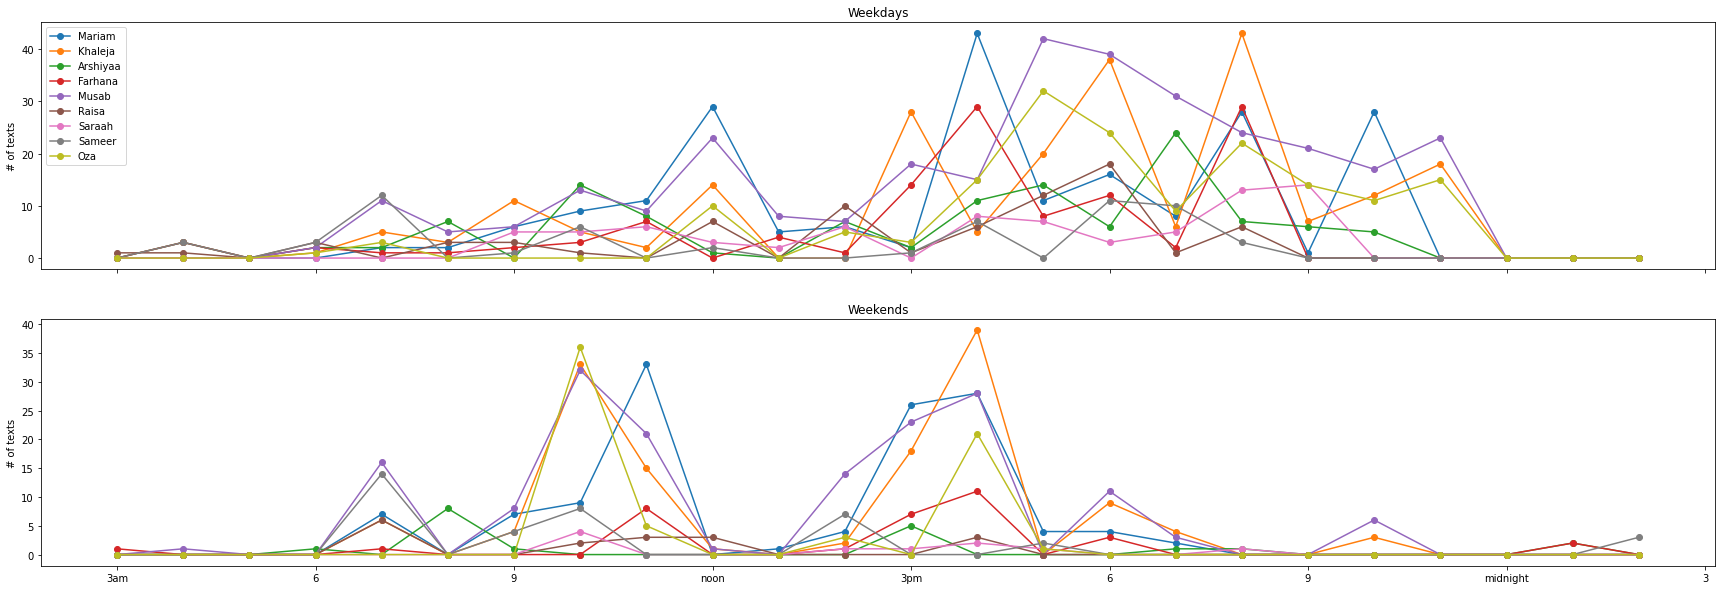

In [14]:
# fig, axs = plt.subplots(2,1, sharex=True, figsize=(15,10))
# handle_ids, handle_names = df['sender'].unique(), df['texter'].unique()
# colors = ["windows blue", "amber", "faded green", "dusty purple"]
# for k,w in enumerate(['Weekdays', 'Weekends']):
#     for id,name in enumerate(zip(handle_ids, handle_names)):
#         if w=='Weekends':
#             hours = [d.hour for d in df[df['sender']==id]['time'] if d.weekday() >= 5]
#         else:
#             hours = [d.hour for d in df[df['sender']==id]['time'] if d.weekday() < 5]
#         hist, bins = np.histogram(hours, bins=range(25), density=False)
#         axs[k].plot(np.append(bins[3:-1], bins[:3]+24), np.append(hist[3:], hist[:3]), 
#                     linestyle='solid', marker='o', label=name)
#     axs[k].set_xticklabels(['3am',6,9,'noon','3pm',6,9,'midnight',3])
#     axs[k].set_xticks([3,6,9,12,15,18,21,24,27])
#     axs[k].set_ylabel('# of texts')
#     if k==0: axs[k].legend(loc=2)
#     axs[k].set_title(w)
# plt.show()


fig, axs = plt.subplots(2,1, sharex=True, figsize=(30,10))
handle_ids, handle_names = df['sender'].unique(), df['texter'].unique()
colors = ["windows blue", "amber", "faded green", "dusty purple"]
for k,w in enumerate(['Weekdays', 'Weekends']):
    for i,(id,name) in enumerate(zip(handle_ids, handle_names)):
        if w=='Weekends':
            hours = [d.hour for d in df[df['sender']==id]['time'] if d.weekday() >= 5]
        else:
            hours = [d.hour for d in df[df['sender']==id]['time'] if d.weekday() < 5]
        hist, bins = np.histogram(hours, bins=range(25), density=False)
        axs[k].plot(np.append(bins[3:-1], bins[:3]+24), np.append(hist[3:], hist[:3]), 
                     linestyle='solid', marker='o', label=name)
    axs[k].set_xticklabels(['3am',6,9,'noon','3pm',6,9,'midnight',3])
    axs[k].set_xticks([3,6,9,12,15,18,21,24,27])
    axs[k].set_ylabel('# of texts')
    if k==0: axs[k].legend(loc=2)
    axs[k].set_title(w)
plt.show()

<AxesSubplot:title={'center':'message count'}>

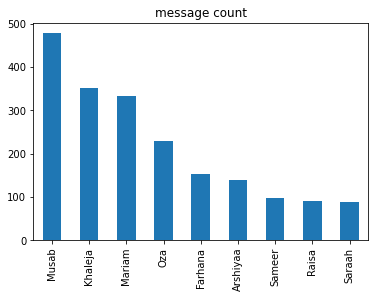

In [15]:
## creates plot that tells how many texts each person has sent
df['texter'].value_counts().plot(kind = 'bar', title = 'message count')

In [16]:
## creates new columns to find for reactions
df = df.dropna()
pd.options.mode.chained_assignment = None 
df['react'] = 0
df['react_emphaized'] = 0
df['react_laugh'] = 0
df['react_liked'] = 0
df['react_disliked'] = 0
df['react_question'] = 0
df['react_loved'] = 0

for row in range(len(df)):
    if "Laughed at" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_laugh'].iloc[row] = 1
    if "Emphasized" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_emphaized'].iloc[row] = 1
    if "Disliked" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_disliked'].iloc[row] = 1
    if "Questioned" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_question'].iloc[row] = 1
    if "Liked" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_liked'].iloc[row] = 1
    if "Loved" in df['text'].iloc[row]:
        df['react'].iloc[row] =  1
        df['react_loved'].iloc[row] = 1

df

,id,text,sender,time,texter,react,react_emphaized,react_laugh,react_liked,react_disliked,react_question,react_loved
0,575836,Sameer I’m so sorry but I thought you would ap...,1244,2022-07-10 15:10:44,Mariam,0,0,0,0,0,0,0
1,575837,Can he see the old stuff,1047,2022-07-10 15:11:09,Khaleja,0,0,0,0,0,0,0
2,575838,￼￼￼,1244,2022-07-10 15:11:51,Mariam,0,0,0,0,0,0,0
3,575839,Okay you can leave now :),1244,2022-07-10 15:11:51,Mariam,0,0,0,0,0,0,0
4,575840,Disliked “Can he see the old stuff”,1244,2022-07-10 15:11:51,Mariam,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951,589288,Pretty sure me and oza are two of the cases,0,2022-07-31 02:44:42,Sameer,0,0,0,0,0,0,0
1952,589289,Just a couple of monkeys,0,2022-07-31 02:44:48,Sameer,0,0,0,0,0,0,0
1953,589290,🙉,0,2022-07-31 02:44:55,Sameer,0,0,0,0,0,0,0
1954,589300,Laughed at “Just a couple of monkeys ”,1091,2022-07-31 04:47:57,Musab,1,0,1,0,0,0,0


<AxesSubplot:title={'center':'Reactions Count'}>

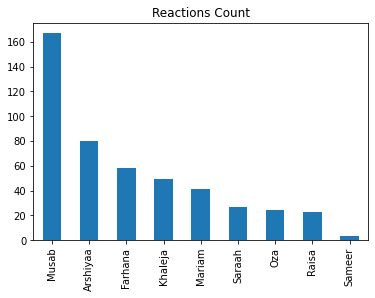

In [17]:
#plots how many reactions are put into 
df1 = df[df.react == 1]
df1['texter'].value_counts().plot(kind = 'bar', title = "Reactions Count")

In [18]:
#intable group of count for each indiviual columns
reactioncount = df1.groupby('texter').sum()
reactioncount.sort_values('react', ascending=False)

,id,sender,react,react_emphaized,react_laugh,react_liked,react_disliked,react_question,react_loved
texter,,,,,,,,,
Musab,97259067,182197,167,50,58,26,6,3,24
Arshiyaa,46567424,99360,80,20,32,4,1,0,23
Farhana,33788319,51736,58,15,27,1,1,0,14
Khaleja,28532635,51303,49,13,12,1,3,0,20
Mariam,23819278,51004,41,7,19,3,3,0,9
Saraah,15732273,33561,27,3,23,0,1,0,0
Oza,14010793,31296,24,12,8,1,1,0,2
Raisa,13363511,28635,23,4,15,2,1,0,1
Sameer,1761623,0,3,1,0,0,0,0,2


In [19]:
##creating 
df1['react_name'] = 0 
for row in range(len(df1)):
    if  df1['react_emphaized'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'emphaized'
    if  df1['react_laugh'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'laughed'
    if  df1['react_liked'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'liked'
    if  df1['react_disliked'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'disliked'
    if  df1['react_question'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'questioned'
    if  df1['react_loved'].iloc[row] == 1:
        df1['react_name'].iloc[row] =  'loved'


<AxesSubplot:xlabel='texter'>

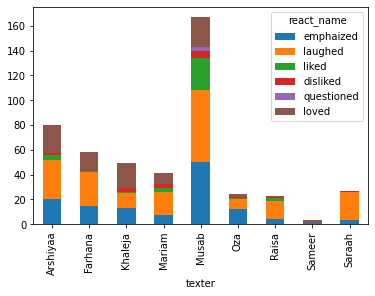

In [20]:
df2 = df1.groupby(['texter', 'react_name'])['texter'].count().unstack('react_name').fillna(0)
df2[['emphaized','laughed', 'liked', 'disliked', 'questioned', 'loved']].plot(kind='bar', stacked=True)

## Adding More Columns 

In [21]:
#Create a column for the number of words in messages
df['words'] = df['text'].apply(lambda x: len(str(x).split(" ")))

#Create another column for the number of characters in messages
df['characters'] = df['text'].str.len()

#Lowercase for all words
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

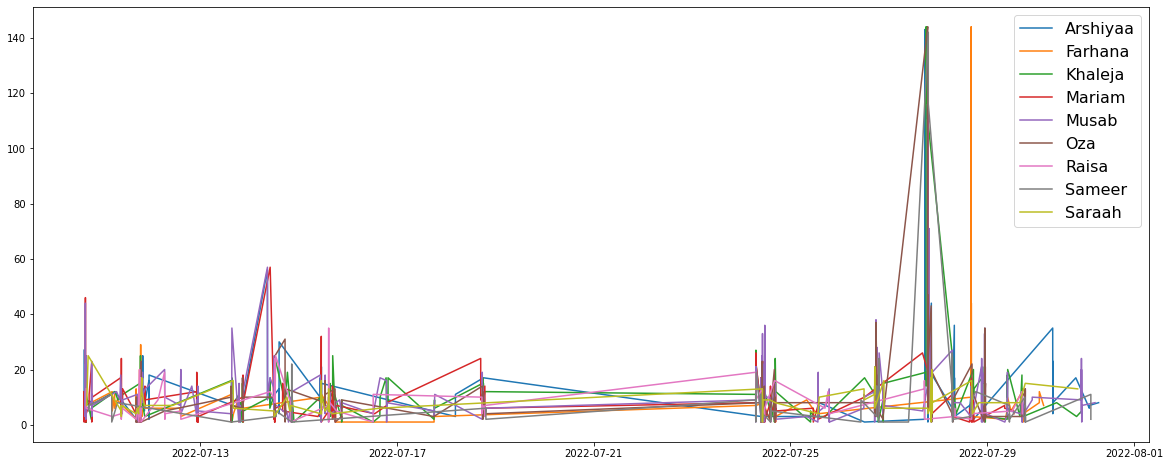

In [23]:
groupSender = df.groupby('texter')
fig, ax = plt.subplots(figsize = (20,8))
for name, group in groupSender:
    ax.plot(group['time'], group['words'], label = name)
    ax.legend(loc='best', prop={'size': 16})
plt.show()

In [24]:
groupsMessage = df.set_index('texter')

for texter in df['texter'].unique():
    nameoftexter = texter
    texter = groupsMessage.loc[texter, "text"].value_counts().head(10)
    texter = pd.DataFrame(texter)
    print(nameoftexter)
    print(texter)


Mariam
                                                    text
￼                                                     13
laughed at an image                                    3
￼￼￼                                                    2
✈️ tajikistan                                          2
and then we’re buying a bus, airplane, submarin...     1
breakfast is either dessert, fruit, or eggs            1
you guys are so right                                  1
laughed at “sameer eats 1000 istighfar and 2500...     1
stick to the journal mogul ia                          1
sustainer sponsored hajj                               1
Khaleja
                                                    text
￼                                                      8
🤣🤣🤣                                                    2
word                                                   2
can he see the old stuff                               1
he wants something savory and protein filled bu...     1
fr this is an ad

In [36]:
df['texter'].unique()

array(['Musab', 'Khaleja', 'Farhana', 'Raisa', 'Sameer', 'Mariam',
       'Arshiyaa', 'Oza', 'Saraah', '0'], dtype=object)